# Predictive Modeling of Customer Bookings

---

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

# Exploratory Data Analysis

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

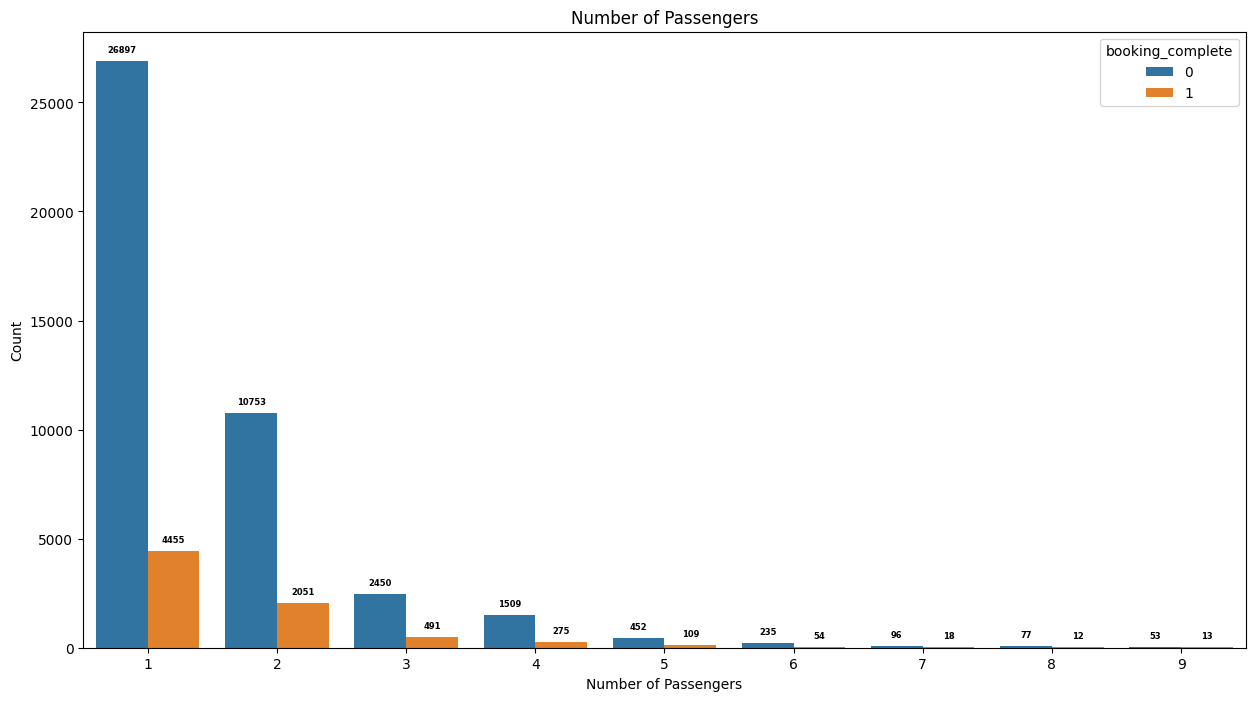

In [6]:
# Number of Passengers
plt.figure(figsize=(15,8))
plots = sns.countplot(x="num_passengers", data=df, hue='booking_complete')
plt.xlabel('Number of Passengers')
plt.ylabel("Count")
plt.title('Number of Passengers')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=6, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight: 
<br> Most of customers book the ticket only for one/two person

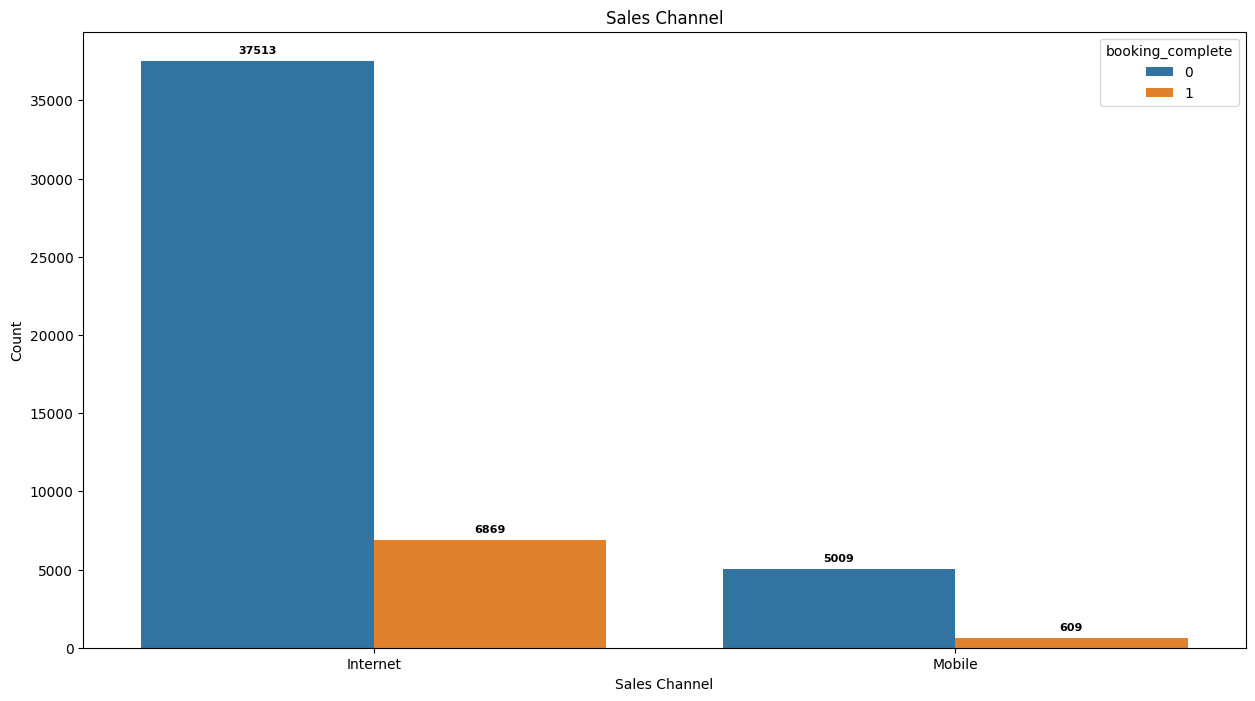

In [7]:
# Sales Channel
plt.figure(figsize=(15,8))
plots = sns.countplot(x="sales_channel", data=df, hue='booking_complete')
plt.xlabel('Sales Channel')
plt.ylabel("Count")
plt.title('Sales Channel')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
<br>Most of customers made a book via internet, but the ratio booking complete for mobile is higher than internet

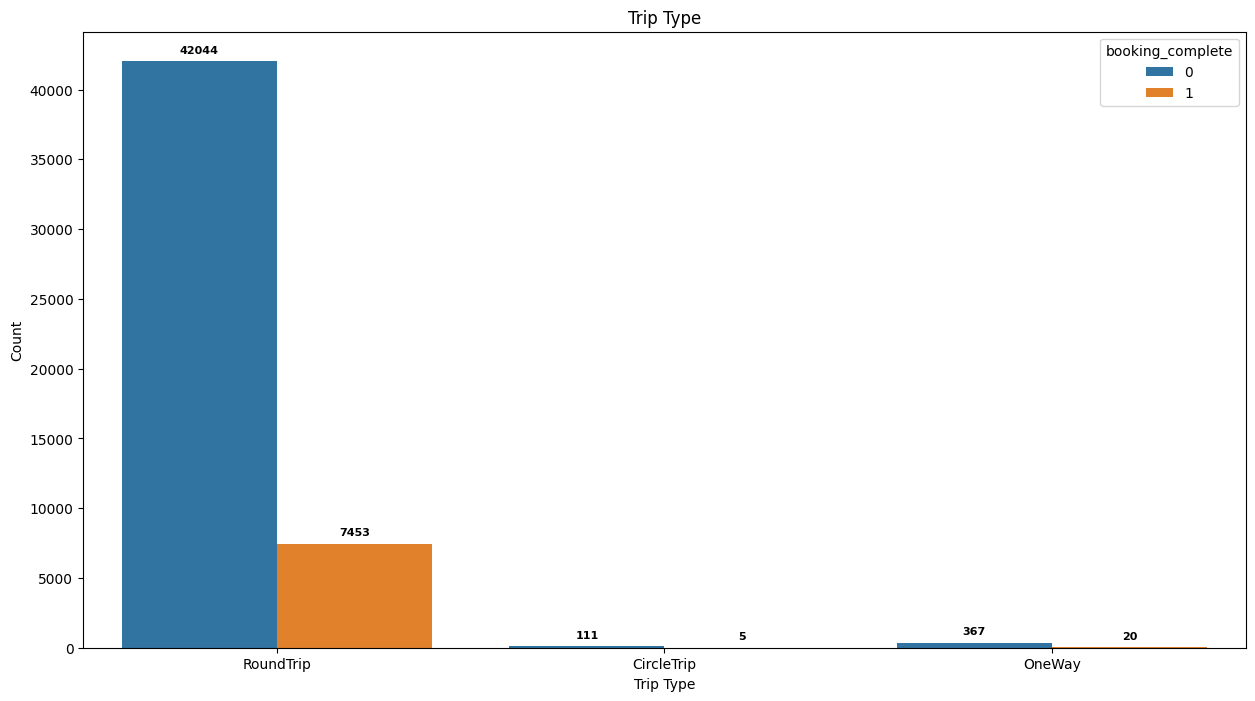

In [8]:
# Trip Type
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type", data=df, hue='booking_complete')
plt.xlabel('Trip Type')
plt.ylabel("Count")
plt.title('Trip Type')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
<br>Round Trip is the most booking by the customers, Usually round trip is booked for holiday or going back to the hometown.

Text(0.5, 1.0, 'Purchase Lead')

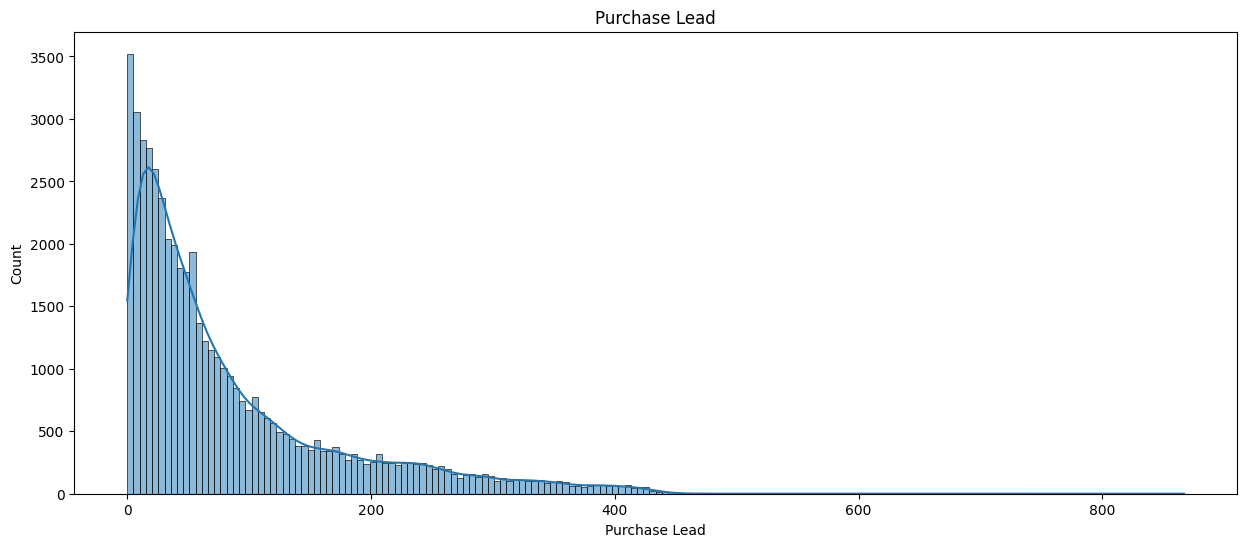

In [9]:
# Purchase Lead
plt.figure(figsize=(15,6))
plots = sns.histplot(x=df['purchase_lead'], data=df, kde=True)
plt.xlabel('Purchase Lead')
plt.ylabel("Count")
plt.title('Purchase Lead')

Insight:
<br>Most customer book the ticket near with the travel date

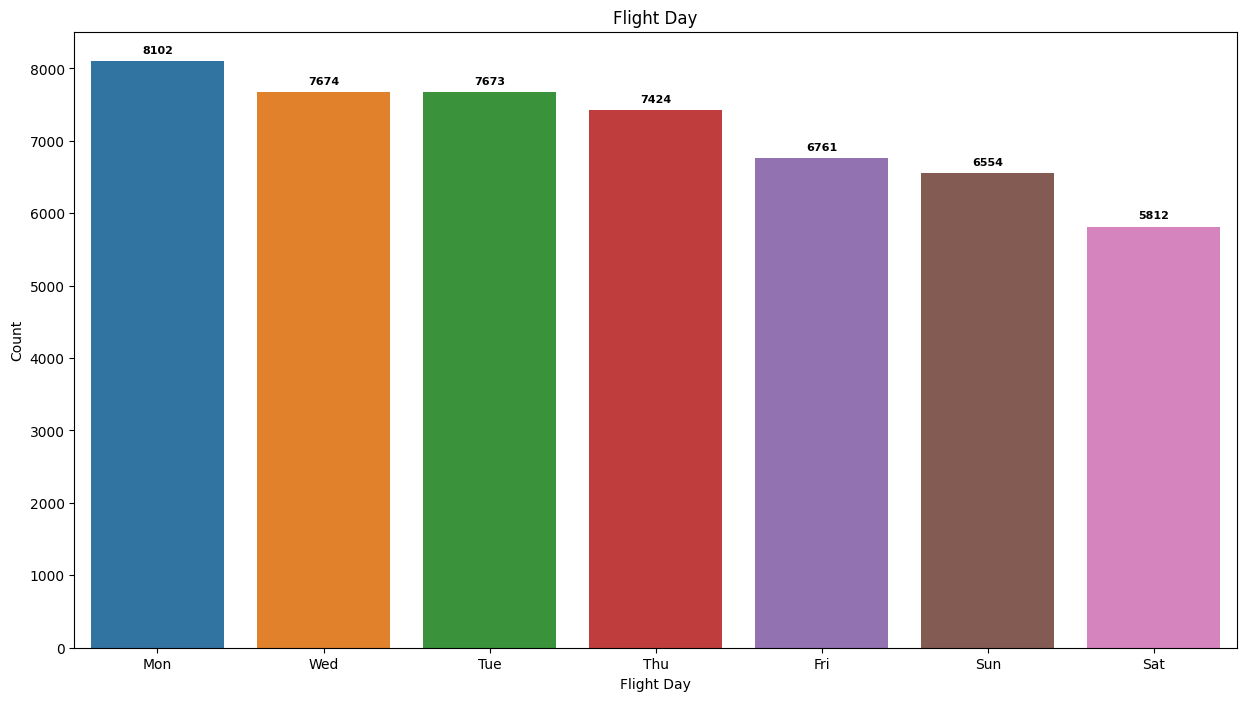

In [10]:
# Flight Day
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_day", data=df, order=df['flight_day'].value_counts().index)
plt.xlabel('Flight Day')
plt.ylabel("Count")
plt.title('Flight Day')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
<br>Monday become the most booked for flight day and Saturday is the least booked for flight day

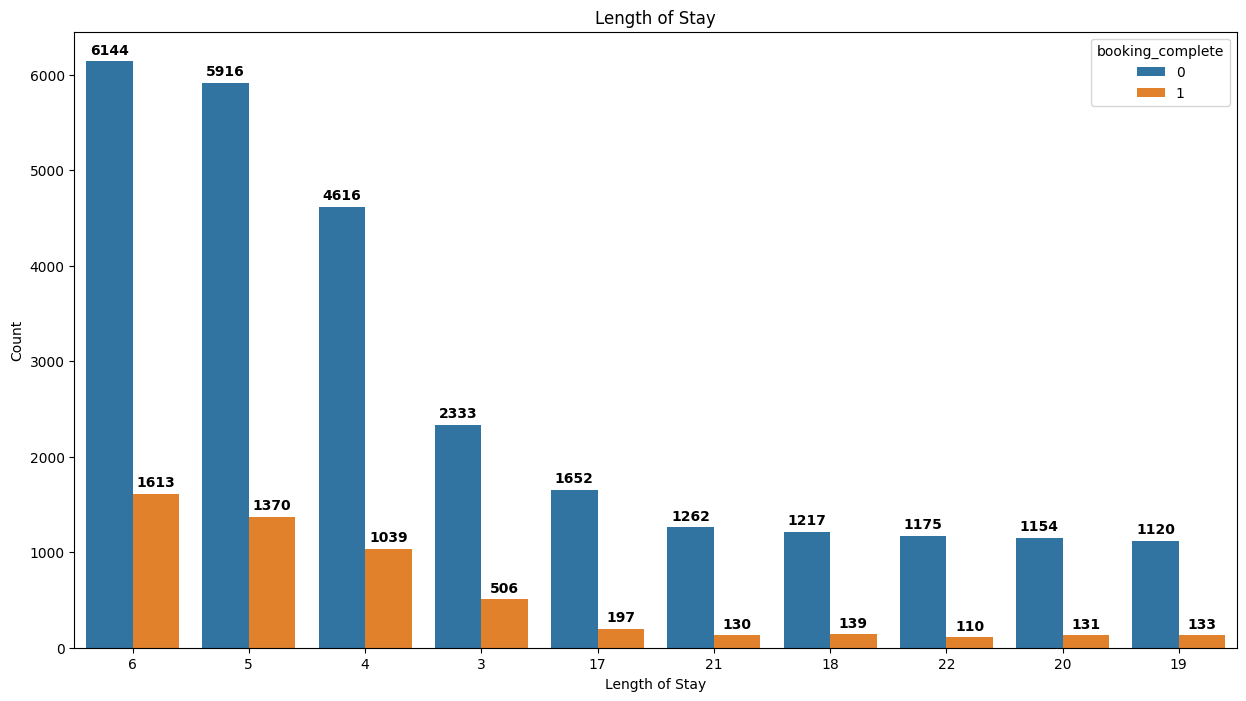

In [11]:
# Top 10 Lenght of Stay
plt.figure(figsize=(15,8))
plots = sns.countplot(data=df, x="length_of_stay", order=df['length_of_stay'].value_counts().iloc[:10].index, hue='booking_complete')
plt.xlabel('Length of Stay')
plt.ylabel("Count")
plt.title('Length of Stay')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=10, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
<br>Most of customers travelled less than 1 week

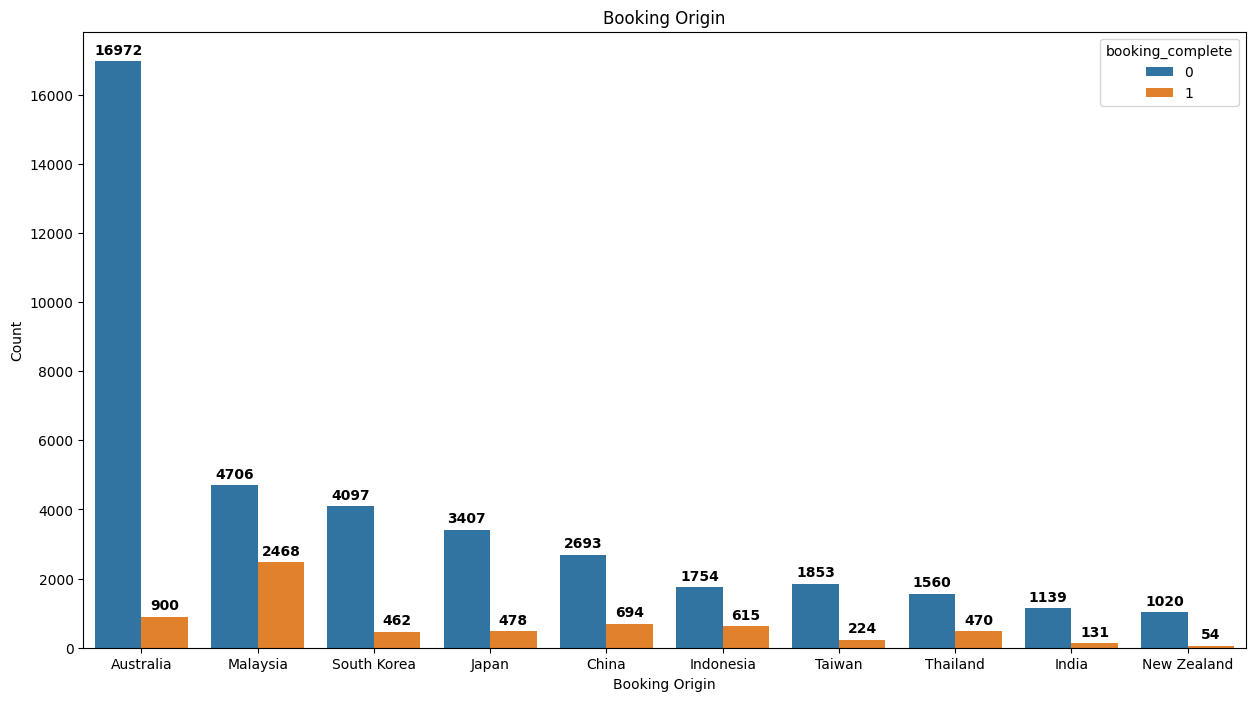

In [12]:
# Top 10 Booking Origin
plt.figure(figsize=(15,8))
plots = sns.countplot(data=df, x="booking_origin", order=df['booking_origin'].value_counts().iloc[:10].index, hue='booking_complete')
plt.xlabel('Booking Origin')
plt.ylabel("Count")
plt.title('Booking Origin')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=10, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
- Australia is the highest booking made by customer, but the booking complete is very low
- Malaysia is the highest booking complete 

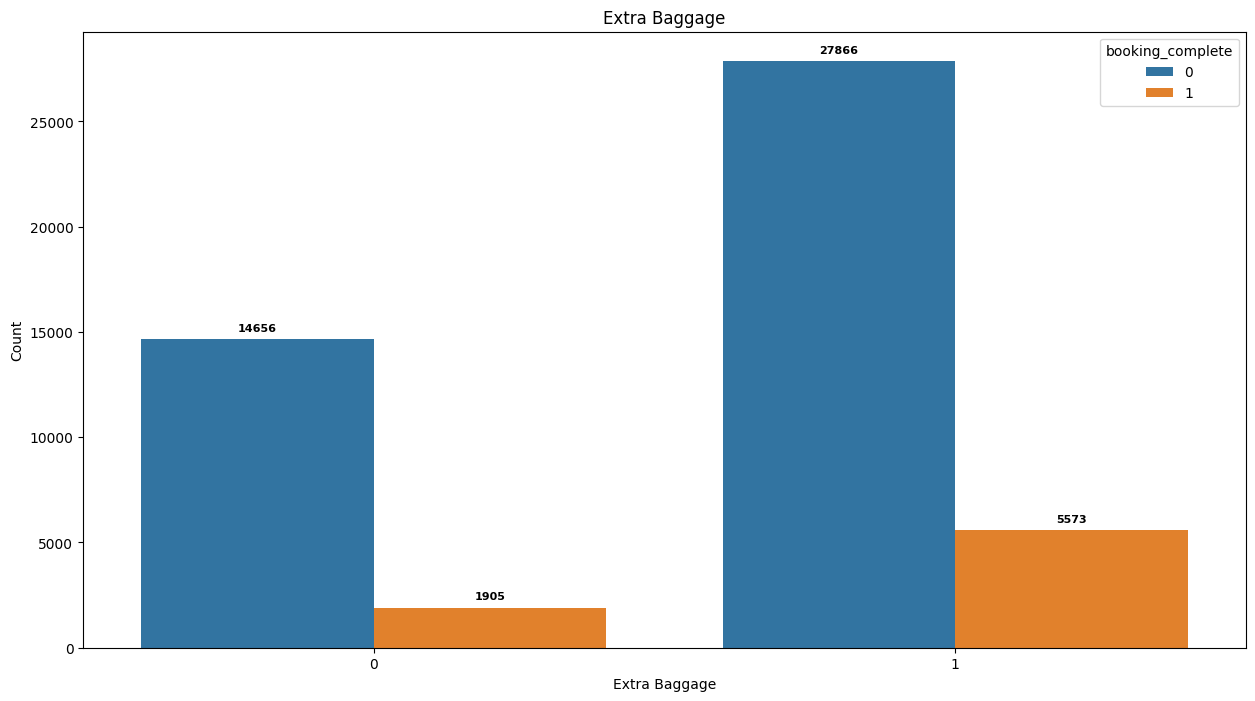

In [13]:
# Want Extra Baggage
plt.figure(figsize=(15,8))
plots = sns.countplot(x="wants_extra_baggage", data=df, hue='booking_complete')
plt.xlabel('Extra Baggage')
plt.ylabel("Count")
plt.title('Extra Baggage')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

Insight:
<br>Most of customers wants extra baggage and for customers who want extra baggage have higher boooking complete ratio 

# Define Target Variable

In [14]:
# Check target data 
df['booking_complete'].value_counts(), df['booking_complete'].value_counts(normalize = True) * 100


(booking_complete
 0    42522
 1     7478
 Name: count, dtype: int64,
 booking_complete
 0    85.044
 1    14.956
 Name: proportion, dtype: float64)

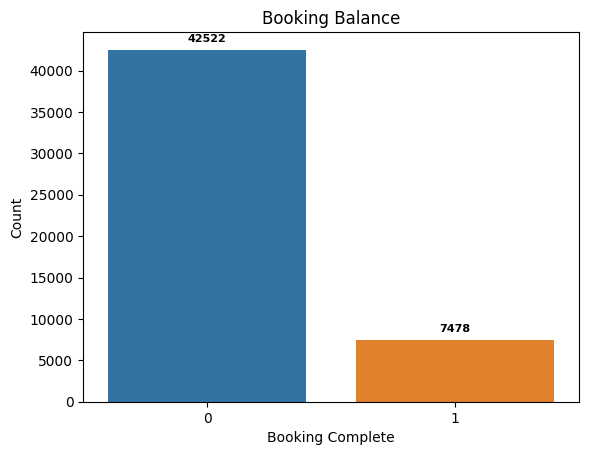

In [15]:
# Check Booking Complete
plots = sns.countplot(x="booking_complete", data=df)
plt.xlabel('Booking Complete')
plt.ylabel("Count")
plt.title('Booking Balance')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width()/2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points', fontweight='bold') 

# Feature Engineering

In [16]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in num_passengers: [2 1 3 4 6 5 7 9 8]
Unique values in sales_channel: ['Internet' 'Mobile']
Unique values in trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in purchase_lead: [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222  64 162 150  73 133  89 151 349  29 12

In [17]:
# Mapping categorical into numerical
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [18]:
df.select_dtypes(include='object').columns.tolist()

['sales_channel', 'trip_type', 'route', 'booking_origin']

In [19]:
# One-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])
df = df.astype(int)
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,7,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,6,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,1,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

## Random Forest

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 917), (10000, 917), (40000,), (10000,))

In [21]:
# Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    
    print("Accuracy  : %.4f" % accuracy_score(y_test, y_pred))
    print("Precision : %.4f" % precision_score(y_test, y_pred))
    print("Recall    : %.4f" % recall_score(y_test, y_pred))
    print("F1-Score  : %.4f" % f1_score(y_test, y_pred))
    print("ROC AUC   : %.4f" % roc_auc_score(y_test, y_pred))

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy  : 0.8552
Precision : 0.5435
Recall    : 0.1351
F1-Score  : 0.2165
ROC AUC   : 0.5577


Because of the ROC AUC score is not really good, we will try to handle imbalanced data using SMOTE.

# Handling Imbalanced Data

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape, X.shape

((85044, 917), (50000, 917))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [26]:
eval_classification(rf)

Accuracy  : 0.8972
Precision : 0.9124
Recall    : 0.8803
F1-Score  : 0.8961
ROC AUC   : 0.8973


After we handle the imbalanced data, we got the better result for evaluation metrics.

# Feature Importances

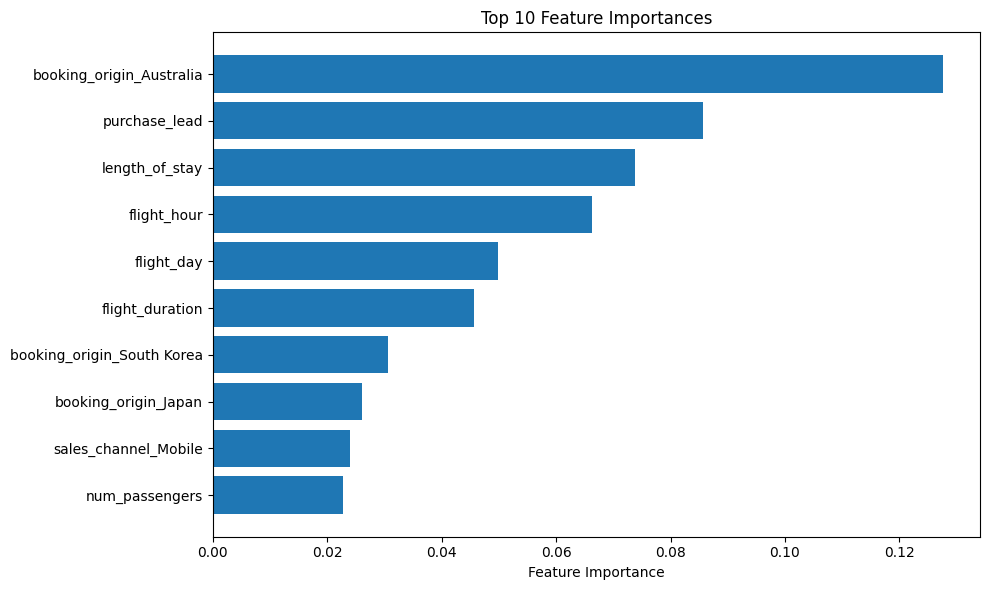

In [27]:
importances = rf.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

top_n = 10
top_importances = sorted_importances[:top_n]
top_feature_names = sorted_feature_names[:top_n]

plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(top_n))
plt.barh(top_feature_names, top_importances)
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()